In [1]:
from qiskit import IBMQ

# Load Account and Choose Backend
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
name = 'ibmqx2'
backend = provider.get_backend(name) # ibmq_16_melbourne, ibmq_vigo, ibmq_london, ibmq_burlington, ibmq_essex, ibmqx2, ibmq_ourense

In [2]:
import warnings
import sys
sys.path.insert(1, '../Scripts')
from expfuncs import *
warnings.filterwarnings('ignore')

interested_qubits = [2,1]
itr = 64
QDT_correlated = True
noise_file_address = 'Noise/'
# all_methods_data(interested_qubits,backend, itr, QDT_correlated, file_address = noise_file_address)

In [3]:
# Collect Grover Data
file_address = 'T1/'
# Groverexp(backend,file_address =file_address)

In [4]:
# Create Filters
our_filter = MeasFilter(interested_qubits,file_address = noise_file_address)
our_filter.post_from_file(seed = 227)

post_dict = {}
for q in interested_qubits:
    post_dict['Qubit{}'.format(q)] = pd.read_csv(noise_file_address + 'StandPostQubit{}.csv'.format(q)).to_numpy()

SB_filter = MeasFilterSB(interested_qubits,post_dict)

In [5]:
# Read Grover data
with open(file_address + 'Count_Grover.csv', mode='r') as sgm:
    reader = csv.reader(sgm)
    temp_counts = {}
    for row in reader:   
        temp_counts[row[0]] = int(row[1])
real_counts = {}
for key in temp_counts.keys():
    real_counts[key[0:2]] = temp_counts[key]

In [6]:
# Filtering
data_shots = 8192

# Read Grover data
for t in [1,2,3,4,5,6]:
    file_address = 'T{}/'.format(t)
    with open(file_address + 'Count_Grover.csv', mode='r') as sgm:
        reader = csv.reader(sgm)
        temp_counts = {}
        for row in reader:   
            temp_counts[row[0]] = int(row[1])
    real_counts = {}
    for key in temp_counts.keys():
        real_counts[key[0:2]] = temp_counts[key]
    print('T' + str(t))
    mean_counts = our_filter.filter_mean(real_counts)
    mode_counts = our_filter.filter_mode(real_counts)
    sbmean_counts = SB_filter.filter_mean(real_counts)
    sbmode_counts = SB_filter.filter_mode(real_counts)
    print('SB Mean',sbmean_counts['11']/data_shots)
    print('SB Mode',sbmode_counts['11']/data_shots)
    print('Our Mean',mean_counts['11']/data_shots)
    print('Our Mode',mode_counts['11']/data_shots)

T1
SB Mean 0.83984375
SB Mode 0.8116455078125
Our Mean 0.8433837890625
Our Mode 0.7991943359375
T2
SB Mean 0.8680419921875
SB Mode 0.836669921875
Our Mean 0.87158203125
Our Mode 0.823974609375
T3
SB Mean 0.8392333984375
SB Mode 0.81103515625
Our Mean 0.8427734375
Our Mode 0.798583984375
T4
SB Mean 0.8414306640625
SB Mode 0.8131103515625
Our Mean 0.844970703125
Our Mode 0.800537109375
T5
SB Mean 0.8656005859375
SB Mode 0.8348388671875
Our Mean 0.869140625
Our Mode 0.8221435546875
T6
SB Mean 0.8560791015625
SB Mode 0.82568359375
Our Mean 0.8594970703125
Our Mode 0.8131103515625


In [7]:
from qiskit.visualization import plot_histogram
# plot_histogram(real_counts)

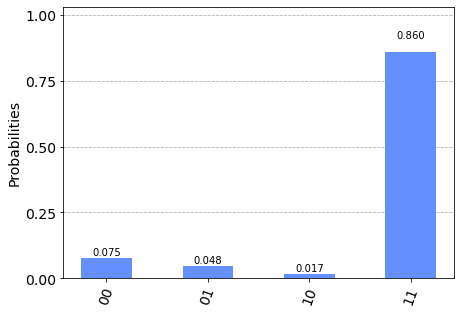

In [8]:
plot_histogram(mean_counts)

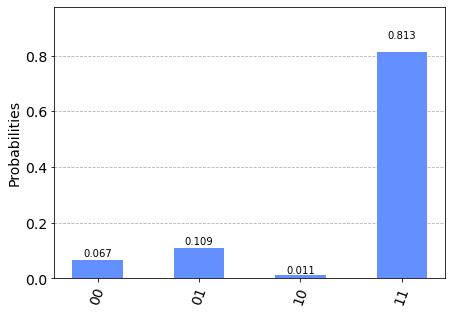

In [9]:
plot_histogram(mode_counts)

In [10]:
from gatesimu import QoI

n = 2
lambdas = np.array([])
for i in range(n):
    lambdas = np.append(lambdas,[1, 1 - 0.02*i,0])
lambdas = lambdas.reshape(n,3)
print(lambdas)
QoI(lambdas, 0.5,200)

[[1.   1.   0.  ]
 [1.   0.98 0.  ]]


array([0.5 , 0.51])

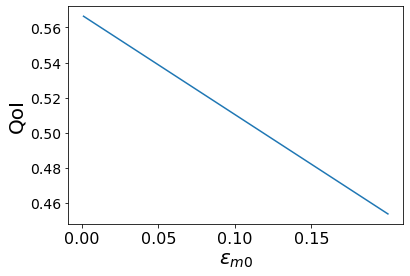

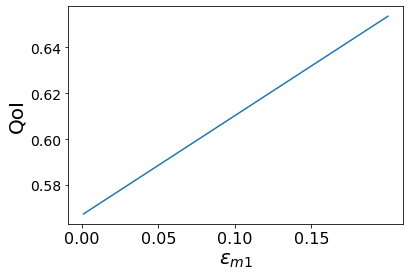

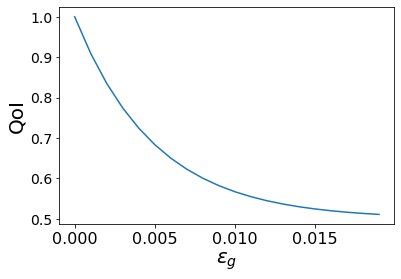

In [37]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

p0s = np.array([])
p0qoi = np.array([])
p1s = np.array([])
p1qoi = np.array([])
epss = np.array([])
epsqoi = np.array([])

for p0 in np.arange(0.8,1,0.001):
        _,z = QoI(np.array([[1,1,0.001],[p0,1,0.01]]), 1,200)
        p0s = np.append(p0s,1-p0)
        p0qoi = np.append(p0qoi,z)
        
for p1 in np.arange(0.8,1,0.001):
        _,z = QoI(np.array([[1,1,0.001],[1,p1,0.01]]), 1,200)
        p1s = np.append(p1s,1-p1)
        p1qoi = np.append(p1qoi,z)
for eps in np.arange(0,0.02,0.001):
        _,z = QoI(np.array([[1,1,0.001],[1,1,eps]]), 1,200)
        epss = np.append(epss, eps)
        epsqoi = np.append(epsqoi,z)

fontsize = 20
plt.plot(p0s,p0qoi)
plt.xlabel('$\epsilon_{m0}$', fontsize=fontsize)
plt.ylabel('QoI', fontsize=fontsize)
plt.xticks(np.arange(0,0.2,0.05), fontsize=16)
plt.yticks(fontsize=14)
plt.savefig('sens-em0.jpg',bbox_inches='tight')
plt.show()
plt.plot(p1s,p1qoi)
plt.xlabel('$\epsilon_{m1}$', fontsize=fontsize)
plt.ylabel('QoI', fontsize=fontsize)
plt.xticks(np.arange(0,0.2,0.05), fontsize=16)
plt.yticks(fontsize=14)
plt.savefig('sens-em1.jpg',bbox_inches='tight')
plt.show()
plt.plot(epss,epsqoi)
plt.xlabel('$\epsilon_{g}$', fontsize=fontsize)
plt.ylabel('QoI', fontsize=fontsize)
plt.xticks(np.arange(0,0.02,0.005), fontsize=16)
plt.yticks(fontsize=14)
plt.savefig('sens-eg.jpg',bbox_inches='tight')
plt.show()

In [12]:
xs = np.array([])
ys = np.array([])
zs = np.array([])

for x in np.arange(0,0.2,0.001):
    for y in np.arange(0,0.02,0.0001):
        _,z = QoI(np.array([[1,1,0],[1 - x,1,y]]), 1,200)
        xs = np.append(xs,x)
        ys = np.append(ys,y)
        zs = np.append(zs,z)

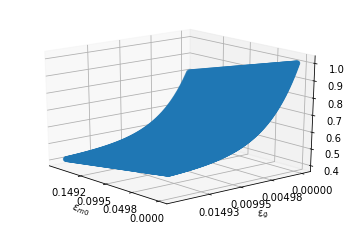

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xs, ys, zs, cmap='hsv')
ax.set_xlabel('$\epsilon_{m0}$')
plt.xticks(np.arange(min(xs), max(xs), (max(xs)/4 - min(xs)/4)))
plt.yticks(np.arange(min(ys), max(ys), (max(ys)/4 - min(ys)/4)))
#ax.set_ylabel('$epsilon_{m1}$')
ax.set_ylabel('$\epsilon_{g}$')
#ax.set_zlabel('AD')
ax.view_init(elev=20., azim=140)
plt.show()

In [14]:
def gate_circ(nGates, gate_type, interested_qubit, itr):
    circ = QuantumCircuit(5,5)
    for _ in range(nGates):
        if gate_type == 'X':
            circ.x(interested_qubit)
        elif gate_type == 'Y':
            circ.y(interested_qubit)
        elif gate_type == 'Z':
            circ.z(interested_qubit)
        else:
            raise Exception('Choose gate_type from X, Y, Z')
        circ.barrier(interested_qubit)
    circ.measure([interested_qubit],[interested_qubit])
    print('Circ depth is ', circ.depth())
    circs = []
    for i in range(itr):
        circs.append(circ.copy('itr'+str(i)))
    return circs

def Gateexp(nGates, gate_type, interested_qubit, itr, backend, file_address = ''):
    circs = gate_circ(nGates, gate_type, interested_qubit, itr)
    # Run on real device
    job_exp = execute(circs, backend = backend, shots = 8192, memory = True, optimization_level = 0)
    job_monitor(job_exp)
    
    # Record bit string
    exp_results = job_exp.result()
    readout = np.array([])
    for i in range(itr):
        readout = np.append(readout,exp_results.get_memory(experiment = ('itr' + str(i))))
        
    with open(file_address + 'Readout_{}{}Q{}.csv'.format(nGates,gate_type,interested_qubit), mode='w') as sgr:
        read_writer = csv.writer(sgr, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        read_writer.writerow(readout)

In [ ]:
# Gateexp(200, 'X', 1, 1, backend, file_address = '')